In [10]:
# !pip install netCDF4 gdown xarray
# !pip install xarray
import netCDF4
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

In [4]:
#Modify the file path to yours
output_file_path = 'C:/Users/Kevin/Downloads/data/data/dt_ena_20130106_vDT2021.nc'

In [5]:
# Open the .nc file
dataset = netCDF4.Dataset(output_file_path, mode="r")

In [6]:
print(dataset)

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    cdm_data_type: Grid
    comment: Sea Surface Height measured by Altimetry and derived variables
    contact: http://climate.copernicus.eu/c3s-user-service-desk
    creator_email: http://climate.copernicus.eu/c3s-user-service-desk
    creator_name: Copernicus Climate Change Service (C3S)
    creator_url: http://climate.copernicus.eu
    date_created: 2021-07-09T18:50:52Z
    date_issued: 2021-07-09T18:50:52Z
    date_modified: 2021-07-09T18:50:52Z
    geospatial_lat_max: 89.875
    geospatial_lat_min: -89.875
    geospatial_lat_resolution: 0.25
    geospatial_lat_units: degrees_north
    geospatial_lon_max: 179.875
    geospatial_lon_min: -179.875
    geospatial_lon_resolution: 0.25
    geospatial_lon_units: degrees_east
    geospatial_vertical_max: 0.0
    geospatial_vertical_min: 0.0
    geospatial_vertical_positive: down
   

In [11]:
ds = xr.open_dataset(output_file_path)
df = ds.to_dataframe()

In [12]:
df

crs  lat_bnds  lon_bnds     sla  \
time       latitude nv longitude                                           
2013-01-06 25.125   0  -99.875   -2147483647      25.0   -100.00     NaN   
                       -99.625   -2147483647      25.0    -99.75     NaN   
                       -99.375   -2147483647      25.0    -99.50     NaN   
                       -99.125   -2147483647      25.0    -99.25     NaN   
                       -98.875   -2147483647      25.0    -99.00     NaN   
...                                      ...       ...       ...     ...   
           49.875   1  -61.125   -2147483647      50.0    -61.00  0.0628   
                       -60.875   -2147483647      50.0    -60.75  0.0592   
                       -60.625   -2147483647      50.0    -60.50  0.0584   
                       -60.375   -2147483647      50.0    -60.25  0.0636   
                       -60.125   -2147483647      50.0    -60.00  0.0758   

                                  err_sla   ugosa  err_ugosa   vgosa  \
time       latitude nv longitude                                       
2013-01-06 25.125   0  -99.875        NaN     NaN        NaN     NaN   
                       -99.625        NaN     NaN        NaN     NaN   
                       -99.375        NaN     NaN        NaN     NaN   
                       -99.125        NaN     NaN        NaN     NaN   
                       -98.875        NaN     NaN        NaN     NaN   
...                                   ...     ...        ...     ...   
           49.875   1  -61.125     0.0263 -0.0303     0.0388 -0.0122   
                       -60.875     0.0249 -0.0384     0.0389 -0.0150   
                       -60.625     0.0222 -0.0400     0.0382  0.0068   
                       -60.375     0.0196 -0.0523     0.0374  0.0518   
                       -60.125     0.0156 -0.0550     0.0348  0.0434   

                                  err_vgosa     adt    ugos    vgos  \
time       latitude nv longitude                                      
2013-01-06 25.125   0  -99.875          NaN     NaN     NaN     NaN   
                       -99.625          NaN     NaN     NaN     NaN   
                       -99.375          NaN     NaN     NaN     NaN   
                       -99.125          NaN     NaN     NaN     NaN   
                       -98.875          NaN     NaN     NaN     NaN   
...                                     ...     ...     ...     ...   
           49.875   1  -61.125       0.0596 -0.0680 -0.0286 -0.0095   
                       -60.875       0.0616 -0.0710 -0.0383 -0.0131   
                       -60.625       0.0595 -0.0715 -0.0411  0.0081   
                       -60.375       0.0525 -0.0659 -0.0545  0.0529   
                       -60.125       0.0506 -0.0536 -0.0581  0.0445   

                                  tpa_correction  flag_ice  
time       latitude nv longitude                            
2013-01-06 25.125   0  -99.875               0.0       NaN  
                       -99.625               0.0       NaN  
                       -99.375               0.0       NaN  
                       -99.125               0.0       NaN  
                       -98.875               0.0       NaN  
...                                          ...       ...  
           49.875   1  -61.125               0.0       0.0  
                       -60.875               0.0       0.0  
                       -60.625               0.0       0.0  
                       -60.375               0.0       0.0  
                       -60.125               0.0       0.0  

[32000 rows x 14 columns]

In [13]:
df.columns

Index(['crs', 'lat_bnds', 'lon_bnds', 'sla', 'err_sla', 'ugosa', 'err_ugosa',
       'vgosa', 'err_vgosa', 'adt', 'ugos', 'vgos', 'tpa_correction',
       'flag_ice'],
      dtype='object')

In [14]:
# Extract the 'sla' (Sea level Anomaly) variable
sla = dataset.variables["sla"][:]
print(sla)

[[[-- -- -- ... 0.0047 0.0117 0.0409]
  [-- -- -- ... -0.0274 -0.0409 -0.0183]
  [-- -- -- ... -0.0223 -0.0409 -0.023700000000000002]
  ...
  [-- -- -- ... 0.0261 0.0241 0.024300000000000002]
  [-- -- -- ... 0.045000000000000005 0.045700000000000005
   0.051800000000000006]
  [-- -- -- ... 0.0584 0.0636 0.0758]]]


In [15]:
# Calculate and print the max of all values stored in sla
max_sla = np.max(sla)
print(f"Maximum SLA: {max_sla}")

Maximum SLA: 0.7373000000000001


In [16]:
# Calculate and print the min of all values stored in sla
min_sla = np.min(sla)

print(f"Minimum SLA: {min_sla}")

Minimum SLA: -0.9118


In [ ]:
# Calculate and print the average of all values stored in sla
average_sla = np.mean(sla)
print(f"Average SLA: {average_sla}")

Average SLA: -0.0027686967632027265


In [17]:
# Extract the latitude and longitude
latitude = dataset.variables["latitude"][:]
longitude = dataset.variables["longitude"][:]

In [18]:
# Close the dataset
dataset.close()

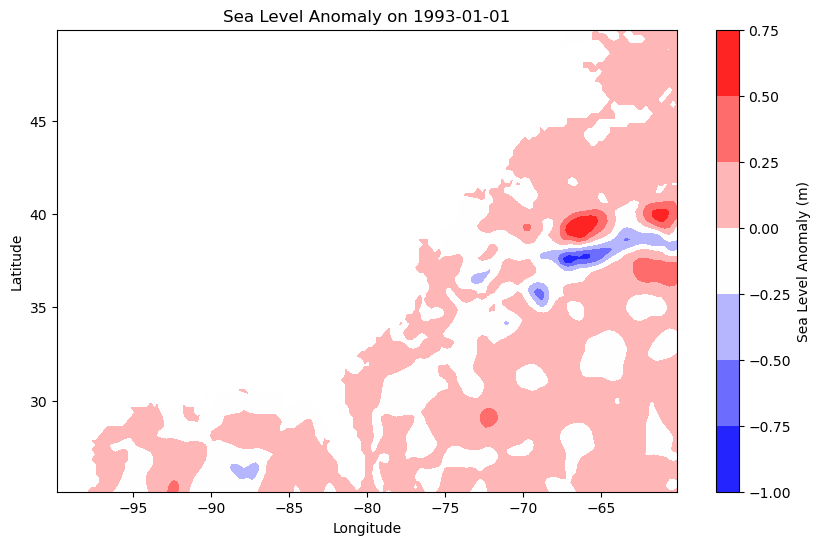

In [19]:
# Create a meshgrid for plotting
lon, lat = np.meshgrid(longitude, latitude)

# Plot the 'sla' variable
plt.figure(figsize=(10, 6))
plt.contourf(lon, lat, sla[0, :, :], cmap="bwr")
plt.colorbar(label="Sea Level Anomaly (m)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Sea Level Anomaly on 1993-01-01")
plt.show()

## Update paths below to run on Local

In [20]:
# Define the directory containing the .nc files, to your local
directory = 'C:/Users/Kevin/Downloads/data/data'

In [21]:
# Initialize a list to store the results
results = []

In [31]:
os.listdir(directory)

['dt_ena_19930101_vDT2021.nc',
 'dt_ena_19930102_vDT2021.nc',
 'dt_ena_19930103_vDT2021.nc',
 'dt_ena_19930104_vDT2021.nc',
 'dt_ena_19930105_vDT2021.nc',
 'dt_ena_19930106_vDT2021.nc',
 'dt_ena_19930107_vDT2021.nc',
 'dt_ena_19930108_vDT2021.nc',
 'dt_ena_19930109_vDT2021.nc',
 'dt_ena_19930110_vDT2021.nc',
 'dt_ena_19930111_vDT2021.nc',
 'dt_ena_19930112_vDT2021.nc',
 'dt_ena_19930113_vDT2021.nc',
 'dt_ena_19930114_vDT2021.nc',
 'dt_ena_19930115_vDT2021.nc',
 'dt_ena_19930116_vDT2021.nc',
 'dt_ena_19930117_vDT2021.nc',
 'dt_ena_19930118_vDT2021.nc',
 'dt_ena_19930119_vDT2021.nc',
 'dt_ena_19930120_vDT2021.nc',
 'dt_ena_19930121_vDT2021.nc',
 'dt_ena_19930122_vDT2021.nc',
 'dt_ena_19930123_vDT2021.nc',
 'dt_ena_19930124_vDT2021.nc',
 'dt_ena_19930125_vDT2021.nc',
 'dt_ena_19930126_vDT2021.nc',
 'dt_ena_19930127_vDT2021.nc',
 'dt_ena_19930128_vDT2021.nc',
 'dt_ena_19930129_vDT2021.nc',
 'dt_ena_19930130_vDT2021.nc',
 'dt_ena_19930131_vDT2021.nc',
 'dt_ena_19930201_vDT2021.nc',
 'dt_ena

In [34]:
os.listdir(directory)[1:5]

['dt_ena_19930102_vDT2021.nc',
 'dt_ena_19930103_vDT2021.nc',
 'dt_ena_19930104_vDT2021.nc',
 'dt_ena_19930105_vDT2021.nc']

In [35]:
#This takes a long time


# Iterate over all files in the directory
for filename in os.listdir(directory)[1:5]:
    if filename.endswith(".nc"):
        file_path = os.path.join(directory, filename)

        # Extract the date part from the filename and format it
        date_str = filename.split("_")[2]
        if len(date_str) == 8:
            formatted_date = f"{date_str[4:6]}-{date_str[6:8]}-{date_str[:4]}"

            # Open the .nc file
            dataset = netCDF4.Dataset(file_path, mode="r")

            # Extract the 'sla' variable
            sla = dataset.variables["sla"][:]

            # Calculate the average of all values stored in sla
            average_sla = np.mean(sla)

            # Determine the value for the additional columns
            value = 1 if average_sla >= 0 else 0

            # Append the result to the list
            results.append([formatted_date, average_sla] + [value] * 12)

            # Close the dataset
            dataset.close()

In [37]:
# Create a DataFrame from the results
columns = [
    "Date",
    "Average_SLA",
    "Atlantic City",
    "Baltimore",
    "Eastport",
    "Fort Pulaski",
    "Lewes",
    "New London",
    "Newport",
    "Portland",
    "Sandy Hook",
    "Sewells Point",
    "The Battery",
    "Washington",
]
results_df = pd.DataFrame(results, columns=columns)

In [25]:
# Remove the Average_SLA column
results_df = results_df.drop(columns=["Average_SLA"])

In [ ]:
# Define the path to the output CSV file
output_csv_path = r"D:\Git\ML-challenge\baseline\demo_sla.csv"

In [ ]:
# Save the DataFrame to a CSV file
results_df.to_csv(output_csv_path, index=False)